In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df_cases0 = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv')
df_deaths0 = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv')

In [4]:
df =  df_deaths0.fillna('')
df = df.set_index(['Country/Region', 'Province/State']) 
df = df.drop(['Lat', 'Long'], axis=1)
df_deaths = df.copy()
df_deaths

,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4
Albania,,0,0,0,0,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15
Algeria,,0,0,0,0,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44
Andorra,,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,3,3,3,6,8,12
Angola,,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,Turks and Caicos Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MS Zaandam,,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Botswana,,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df =  df_cases0.fillna('')
df = df.set_index(['Country/Region', 'Province/State']) 
df = df.drop(['Lat', 'Long'], axis=1)
df_cases = df.copy()
df_cases

,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,0,0,0,0,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
Albania,,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
Algeria,,0,0,0,0,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
Andorra,,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
Angola,,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,Turks and Caicos Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4,5,5
MS Zaandam,,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2
Botswana,,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4


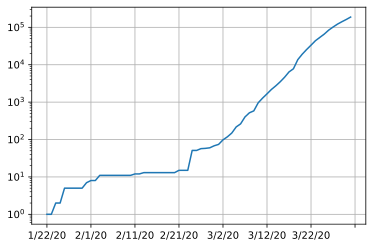

In [6]:
df_cases.loc[('US', '')].plot(logy=True).grid()

In [7]:
df = df_deaths.query(' `3/29/20` > 500 ').T.loc['3/1/20':].copy()
df.columns = df.columns.get_level_values(0)
dfd = df.copy()

df = df_cases.query(' `3/29/20` > 10000 ').T.loc['3/1/20':].copy()
df.columns = df.columns.get_level_values(0)
dfc = df.copy()

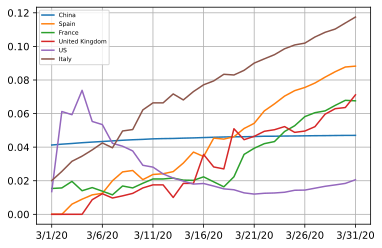

In [8]:
a =  (dfd / dfc)[['China', 'Spain', 'France', 'United Kingdom', 'US', 'Italy']].plot()
a.legend(fontsize=6)
a.grid()

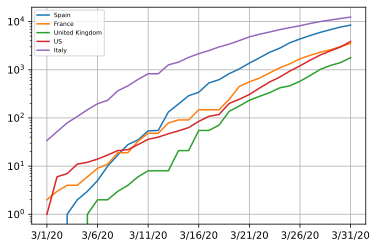

In [9]:
a = dfd[['Spain', 'France', 'United Kingdom', 'US', 'Italy']].plot(logy=True)
a.legend(fontsize=6)
a.grid()

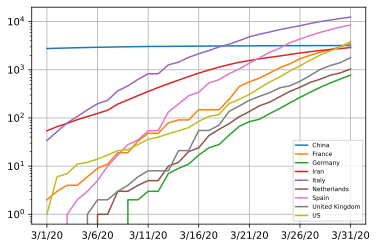

In [10]:
a = dfd.plot(logy=True)
a.legend(fontsize=6)
a.grid()

In [11]:
x = pd.to_datetime(dfd.index)

In [12]:
np.array((x - x[0])/(x[1]-x[0]), dtype=float)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.])

This function will fit a polynomial regression for a set of countries. The return is a faceted plot of the actual and predicted values.

In [13]:
def quick_fit(df, d1, p, cs, days, nr, nc):
    '''
    Fit to df
    d1 = day 1 to use 
    powers up to p in regression
    cs = list of country name
    days = days to project forward 
    nr, nc = layout for plot 
    '''
    f, axs = plt.subplots(nr, nc, figsize=(8,6), tight_layout=True)
    ax = iter(axs.flatten())
    bit = df.loc[d1:, cs[0]]
    d = None
    d_new = np.arange(0, days, dtype=float)
    X_new = np.array([np.ones_like(d_new)] + [d_new **t for t in range(1, p)]).T
    ans = {}
    for c in cs:
        bit = df.loc[d1:, c]
        if d is None:
            d = np.arange(0, len(bit), dtype=float)
            X = np.array([np.ones_like(d)] + [d **t for t in range(1, p)]).T
        y = np.log10(bit)
        regressor = LinearRegression()  
        try:
            regressor.fit(X, y)
            y_pred = regressor.predict(X_new)
            a = next(ax)
            a.plot(y.values, label='Data')
            a.lines[0].set_linewidth(3)
            a.plot(d_new, y_pred, label=f'Fit {p}')
            a.set(title=c)
            a.grid()
            a.legend(fontsize=8)
            ans[c] = regressor
        except:
            pass
    return ans

In [14]:
dfd.columns

Index(['China', 'France', 'Germany', 'Iran', 'Italy', 'Netherlands', 'Spain',
       'United Kingdom', 'US'],
      dtype='object', name='Country/Region')

/home/brian/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/brian/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


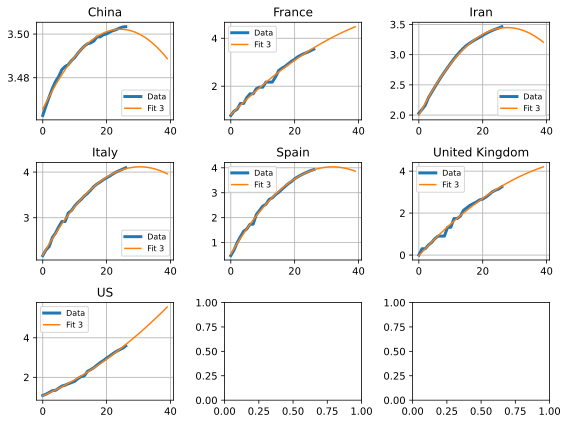

In [15]:
ans = quick_fit(dfd, '3/5/20', 3, dfd.columns , 40, 3, 3)

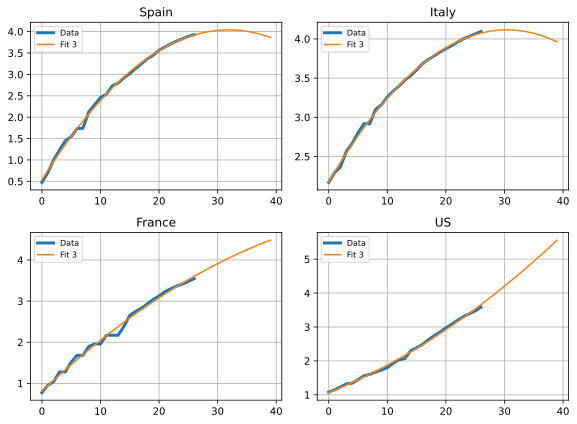

In [16]:
ans = quick_fit(dfd, '3/5/20', 3, ['Spain','Italy', 'France', 'US'] , 40, 2, 2)

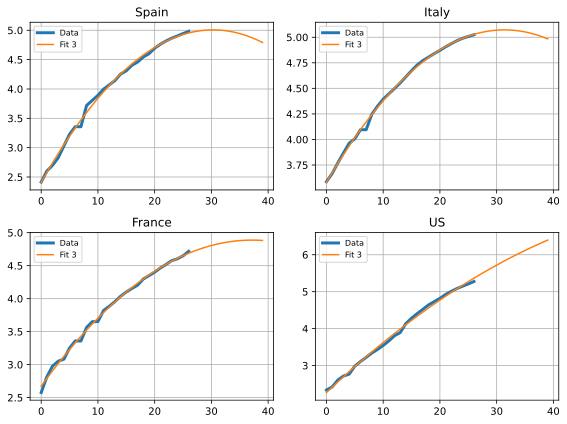

In [17]:
ans = quick_fit(dfc, '3/5/20', 3, ['Spain','Italy', 'France', 'US'] , 40, 2, 2)

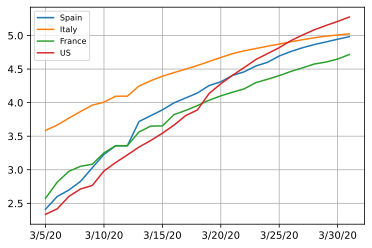

In [18]:
a = np.log10(dfc.loc['3/5/20':, ['Spain','Italy', 'France', 'US']]).plot()
a.grid()
a.legend(fontsize=8)

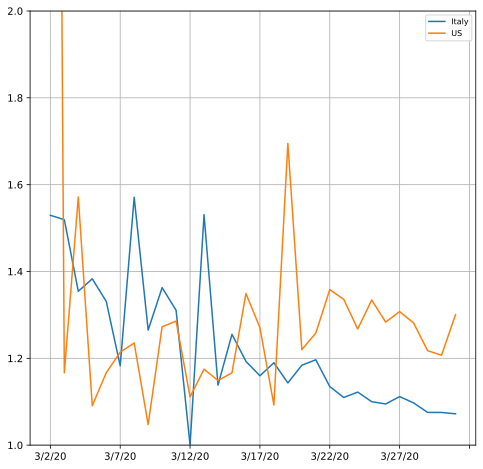

In [19]:
f, a = plt.subplots(1,1, figsize=(8,8))
for c in  ['Italy',  'US' ]:
    s = dfd[c]
    a =  (s.iloc[1:] / s.iloc[:-1].values).plot(ax=a, label=c)
a.grid()
a.set(ylim=[1,2])
a.legend(fontsize=8)

3/2/20          NaN
3/3/20    -4.833333
3/4/20     0.404762
3/5/20    -0.480519
3/6/20     0.075758
3/7/20     0.047619
3/8/20     0.021008
3/9/20    -0.187675
3/10/20    0.225108
3/11/20    0.012987
3/12/20   -0.174603
3/13/20    0.063889
3/14/20   -0.026064
3/15/20    0.017730
3/16/20    0.182540
3/17/20   -0.078618
3/18/20   -0.177996
3/19/20    0.602323
3/20/20   -0.474915
3/21/20    0.038197
3/22/20    0.100109
3/23/20   -0.022575
3/24/20   -0.068227
3/25/20    0.066773
3/26/20   -0.050838
3/27/20    0.024253
3/28/20   -0.026225
3/29/20   -0.063797
3/30/20   -0.010536
3/31/20    0.093403
Name: US, dtype: float64

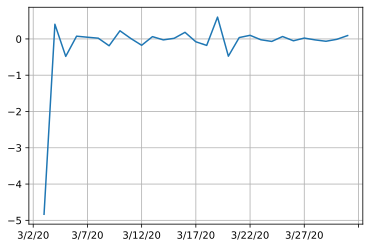

In [20]:
s = dfd['US']
a = ((s.iloc[1:] / s.iloc[:-1].values).diff()).plot()
a.grid()
(s.iloc[1:] / s.iloc[:-1].values).diff()

In [21]:
xs = np.linspace(-1000000,1000000,100001)

In [22]:
np.where(xs < 0 , 0, 1)

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
def g(x):
    x4 = np.abs(x) ** .25
    return np.where(x < 0, np.exp(-x4 * (1 + np.sin(x4))), np.exp(-x4 * (1 - np.sin(x4)))) / 48

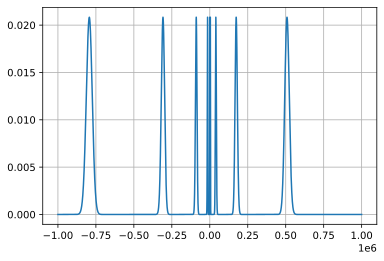

In [24]:
plt.plot(xs, g(xs))
plt.gca().grid()

In [25]:
dfc.head()

Country/Region,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,Switzerland,United Kingdom,US
3/1/20,2,66907,130,130,978,1694,10,84,27,36,74
3/2/20,8,67103,191,159,1501,2036,18,120,42,40,98
3/3/20,13,67217,204,196,2336,2502,24,165,56,51,118
3/4/20,23,67332,285,262,2922,3089,38,222,90,85,149
3/5/20,50,67466,377,482,3513,3858,82,259,114,115,217


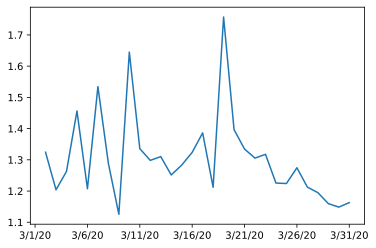

In [26]:
(dfc.US / dfc.US.shift(1)).plot()

In [27]:
def decay_fit(df, d1, p, means, cs, days, nr, nc):
    '''
    Fit to df
    d1 = day 1 to use 
    powers up to p in regression
    cs = list of country name
    days = days to project forward 
    nr, nc = layout for plot 
    '''
    f, axs = plt.subplots(nr, nc, figsize=(8,6), squeeze=False, tight_layout=True)
    ax = iter(axs.flatten())
    bit = df.loc[d1:, cs[0]]
    d = None
    d_new = np.arange(1, 1+days, dtype=float)
    if means is None:
        X_new = np.array([np.ones_like(d_new)] + [d_new ** t for t in range(-1, -p-1, -1)]).T
    else:    
        X_new = np.array([np.ones_like(d_new)] + [np.exp(-d_new / m) for m in means]).T
    
    ans = {}
    chg_all = df / df.shift(1) - 1
    for c in cs:
        y = chg_all.loc[d1:, c]
        if d is None:
            d = np.arange(1, 1+len(y), dtype=float)
            if means is None:
                X = np.array([np.ones_like(d)] + [d **t for t in range(-1, -p-1, -1)]).T
            else:
                X = np.array([np.ones_like(d)] + [np.exp(-d / m) for m in means]).T
        regressor = LinearRegression()  
        try:
            regressor.fit(X, y)
            y_pred = regressor.predict(X_new)
            a = next(ax)
            a.plot(y.values, label='Data')
            a.lines[0].set_linewidth(3)
            a.plot(d_new, y_pred, label=f'Fit {p}')
            a.set(title=c)
            a.grid()
            a.legend(fontsize=8)
            ans[c] = regressor
        except:
            pass
    return ans

{'Italy': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}

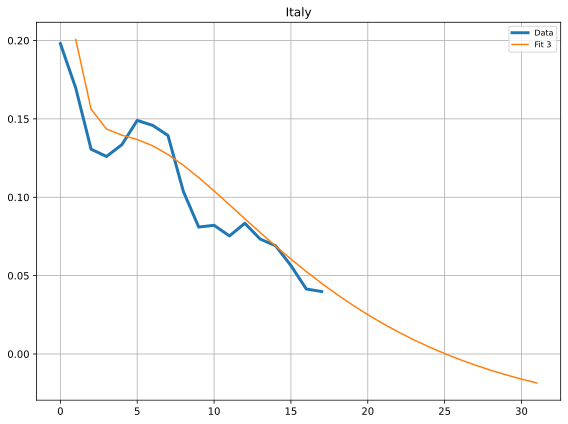

In [28]:
decay_fit(dfc, '3/14/20', 3, [1, 5, 10], ['Italy'], 31, 1, 1 )

{'Italy': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}

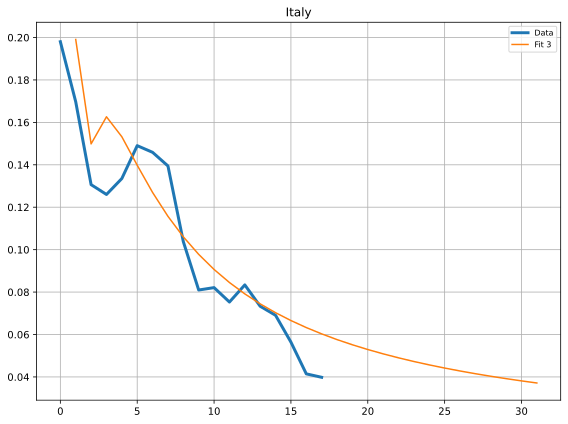

In [29]:
decay_fit(dfc, '3/14/20', 3, None, ['Italy'], 31, 1, 1 )

In [30]:
d1  = '3/19/20'
cs =['US']
days= 31
df = dfc
p = 3
bit = df.loc[d1:, cs[0]]
d = None
d_new = np.arange(1, 1+days, dtype=float)
X_new = np.array([np.ones_like(d_new)] + [d_new ** t for t in range(-1, -p-1, -1)]).T

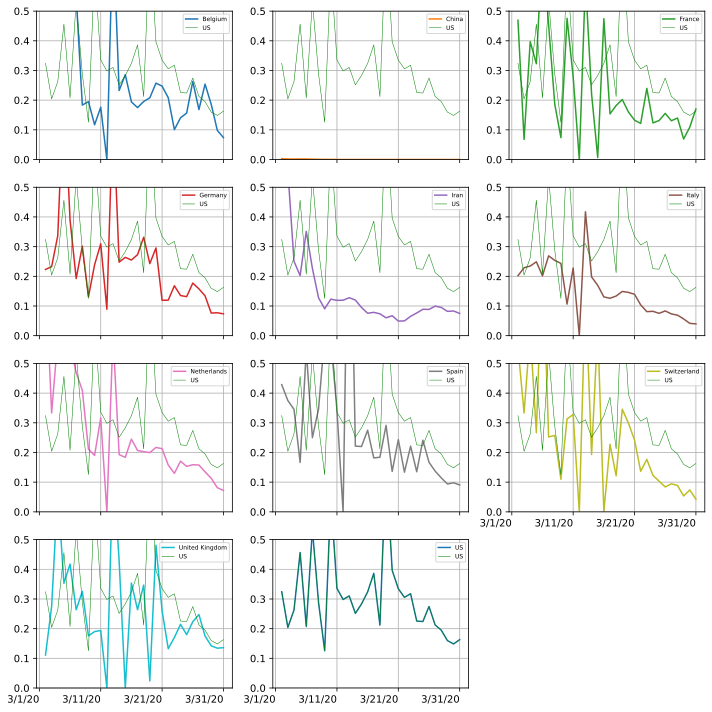

In [31]:
axs = (dfc / dfc.shift(1) - 1).plot(subplots=True, layout=(4,3), figsize=(10,10));
us = dfc['US'] / dfc['US'].shift(1) - 1
for a in axs.flatten():
    us.plot(ax=a, c='green', lw=0.5)
    a.grid()
    a.legend(fontsize=6)
    a.set(ylim=[0,.5])
plt.tight_layout()

In [32]:
ans = {}
chg_all = df / df.shift(1)
for c in cs:
    y = chg_all.loc[d1:, c]
    if d is None:
        d = np.arange(0, len(y), dtype=float)
        X = np.array([np.ones_like(d)] + [d **t for t in range(-1, -p-1, -1)]).T
    regressor = LinearRegression()  
    try:
        regressor.fit(X, y)
        y_pred = regressor.predict(X_new)
        a = next(ax)
        a.plot(y.values, label='Data')
        a.lines[0].set_linewidth(3)
        a.plot(d_new, y_pred, label=f'Fit {p}')
        a.set(title=c)
        a.grid()
        a.legend(fontsize=8)
        ans[c] = regressor
    except:
        pass

/home/brian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in reciprocal
  import sys
/home/brian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


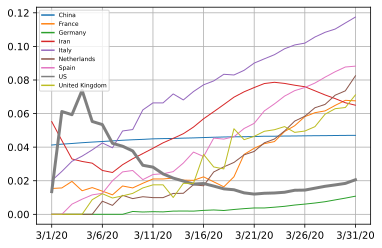

In [33]:
a = (dfd/ dfc).drop(labels=['Switzerland', 'Belgium'], axis=1).plot()
a.grid()
a.legend(fontsize=6)
for l in a.lines:
    if l.get_label()=='US':
        l.set_linewidth(3)
    else:
        l.set_linewidth(1)

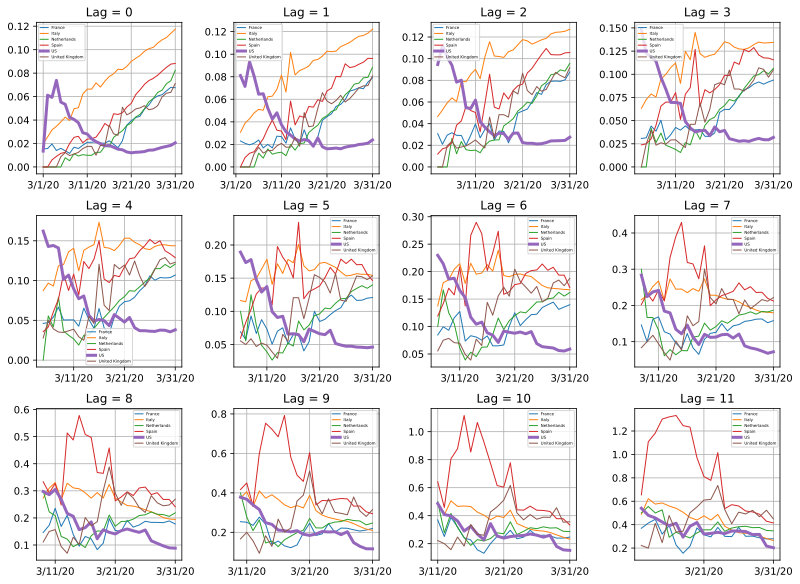

In [34]:
f, axs = plt.subplots(3,4, figsize=(11,8), squeeze=False, constrained_layout=True)
ax = iter(axs.flatten())
for l in range(12):
    a = next(ax)
    (dfd / dfc.shift(l)).drop(labels=['Switzerland', 'China', 'Iran', 'Germany', 'Belgium'], axis=1).plot(ax=a)
    a.grid()
    for ln in a.lines:
        ln.set_linewidth(1)
    a.lines[4].set_linewidth(3)
    a.legend(fontsize=4)
    a.set(title=f'Lag = {l}')

/home/brian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


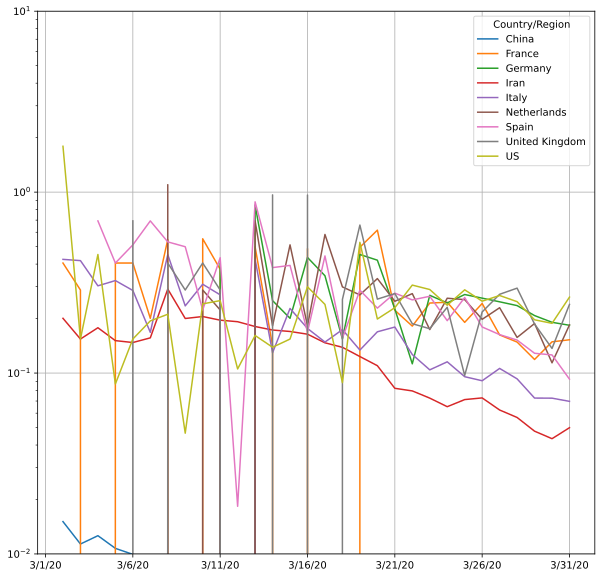

In [35]:
a = np.log(dfd).diff().plot(figsize=(10,10), logy=True, ylim=[1e-2, 10])
a.grid()

/home/brian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


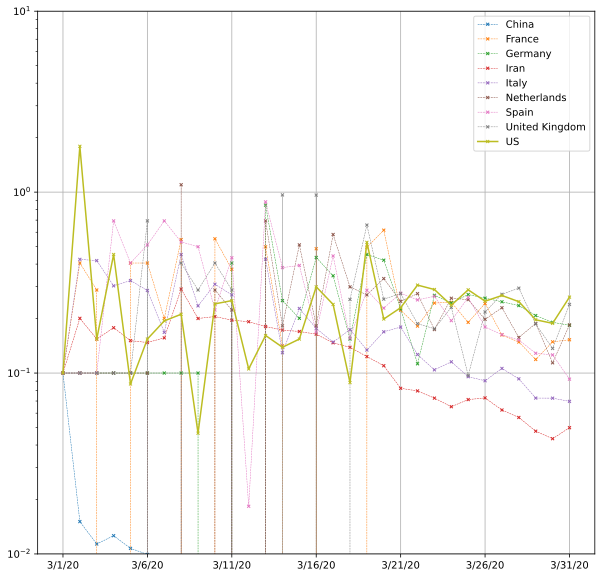

In [36]:
pd.options.mode.use_inf_as_na = True
a = np.log(dfd).diff().fillna(1e-1) .plot(figsize=(10,10), logy=True, ylim=[1e-2, 10])
for l in a.lines:
    if l.get_label() == 'US':
        l.set(linestyle='-', lw=1.5)        
    else:
        l.set(linestyle='--', lw=.5)
    l.set(marker='x', markersize=3)
a.legend()
a.grid()